### Import Libraries

In [66]:
import requests
import pandas as pd
import time
from wordcloud import WordCloud
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import re

### Import API key

In [2]:
import config
api_key = config.api_key
userAgent = config.email

In [3]:
print(api_key)
print(userAgent)

LiHO2TmxDytZFf8ZHQiWUWZM8LXgReTO0VvBjEJHPnA=
christopher.maringka@gmail.com


### At first I was thinking to specifically find data analyst requirements, but given how broad the term could be might as well use just 'data'

In [20]:
url = 'https://data.usajobs.gov/api/search?JobCategoryCode=2210&Keyword=Data'
    
headers = {
    "Host": "data.usajobs.gov",
    "User-Agent": userAgent,
    "Authorization-Key": api_key
}

response = requests.get(url, headers = headers).json()

In [21]:
response

{'LanguageCode': 'EN',
 'SearchParameters': {},
 'SearchResult': {'SearchResultCount': 25,
  'SearchResultCountAll': 427,
  'SearchResultItems': [{'MatchedObjectId': '652648400',
    'MatchedObjectDescriptor': {'PositionID': 'DEST-11485818-22-CB',
     'PositionTitle': 'Business Analyst (Data Modeler/Metadata Specialist/Open Government Data Specialist)',
     'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/652648400',
     'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/652648400?PostingChannelID='],
     'PositionLocationDisplay': 'Washington, District of Columbia',
     'PositionLocation': [{'LocationName': 'Washington, District of Columbia',
       'CountryCode': 'United States',
       'CountrySubDivisionCode': 'District of Columbia',
       'CityName': 'Washington, District of Columbia',
       'Longitude': -77.032,
       'Latitude': 38.8904}],
     'OrganizationName': 'Federal Reserve System--Board of Governors',
     'DepartmentName': 'Other Agencies

In [13]:
response['SearchResult']['SearchResultItems'][0]['MatchedObjectDescriptor']['QualificationSummary']

"Data Modeler\nStrong knowledge of conceptual, logical, and physical data models, business operating models, data management principles and process engineering acquired through completion of a bachelor's degree in business, economics, finance, information science, or related field and a minimum of 4 years of related experience or a master's degree in a related field and 3 years of related experience. Must possess clear, concise, and effective verbal and written communication, including the ability to effectively communicate with technical personnel, business customers, and management, and proven ability to think conceptually and abstractly. Crisp business execution and project management rigor are required along with a demonstrated commitment to a strong customer service philosophy. Metadata Specialist\nStrong knowledge of data and metadata management principles, business analysis and process engineering acquired through completion of a bachelor's degree in business, economics, finance

In [27]:
response['SearchResult']['SearchResultItems'][0]['MatchedObjectDescriptor']['UserArea']['Details']['Education']

"A bachelor's degree in business, economics, finance, information science, or related field or a minimum of 5 years of related experience or a master's degree in a related field and 4 years of related profession experience."

In [55]:
df = pd.DataFrame(columns=['JobSummary', 'Education'])

In [58]:
for item in response['SearchResult']['SearchResultItems']:
    summaries = item['MatchedObjectDescriptor']['QualificationSummary']
    educations = item['MatchedObjectDescriptor']['UserArea']['Details']['Education']
    
    df = df.append({'JobSummary': summaries, 'Education': educations}, ignore_index = True)

In [59]:
print(df)

                                           JobSummary  \
0   Data Modeler\nStrong knowledge of conceptual, ...   
1   Qualifying experience for the EL-12 level incl...   
2   Applicants must have a minimum of one year of ...   
3   For all IT positions, individuals must have IT...   
4   For all IT positions, individuals must have IT...   
5   You must meet the qualification requirements b...   
6   Qualifications required: The FRTF is a fast pa...   
7   Applicants must have demonstrated experience a...   
8   To qualify for an IT Specialist (DATAMGT/APPSW...   
9   You must meet the following requirements by th...   
10  You must meet the following requirements withi...   
11  In order to qualify, you must meet the special...   
12  Specialized Experience GS-09: Must have at lea...   
13  Your resume must demonstrate at least one year...   
14  Who May Apply:\nOnly applicants who meet one o...   
15  You may qualify at the GS-12, if you fulfill t...   
16  In order to qualify for an 

In [74]:
for arg in df["JobSummary"]: 

    tokens = arg.split(" ")  
      
    print(Counter(tokens))

Counter({'and': 25, 'a': 15, 'of': 13, 'business': 8, 'related': 8, 'to': 8, 'management': 6, 'with': 6, 'or': 5, 'ability': 5, 'knowledge': 4, 'data': 4, 'degree': 4, 'in': 4, 'field': 4, 'years': 4, 'the': 4, 'process': 3, 'Must': 3, 'possess': 3, 'clear,': 3, 'concise,': 3, 'effective': 3, 'verbal': 3, 'written': 3, 'communication,': 3, 'including': 3, 'effectively': 3, 'communicate': 3, 'technical': 3, 'personnel,': 3, 'customers,': 3, 'Crisp': 3, 'execution': 3, 'project': 3, 'rigor': 3, 'are': 3, 'required': 3, 'along': 3, 'demonstrated': 3, 'commitment': 3, 'strong': 3, 'customer': 3, 'service': 3, 'philosophy.': 3, 'Data': 2, 'models,': 2, 'principles': 2, 'engineering': 2, 'acquired': 2, 'through': 2, 'completion': 2, "bachelor's": 2, 'business,': 2, 'economics,': 2, 'finance,': 2, 'information': 2, 'science,': 2, 'minimum': 2, '4': 2, 'experience': 2, "master's": 2, '3': 2, 'experience.': 2, 'management,': 2, 'proven': 2, 'think': 2, 'conceptually': 2, 'abstractly.': 2, 'Mana

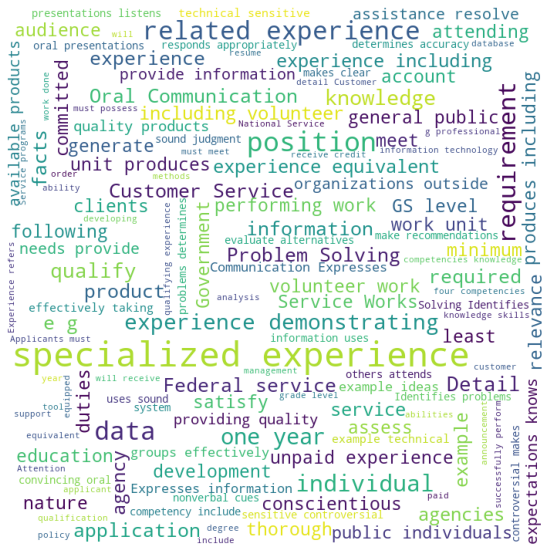

<Figure size 432x288 with 0 Axes>

In [75]:
for arg in df["JobSummary"]: 

    tokens = arg.split()  
      
    top_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(top_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (7.5, 7.5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
plt.savefig("WordCloud.png")

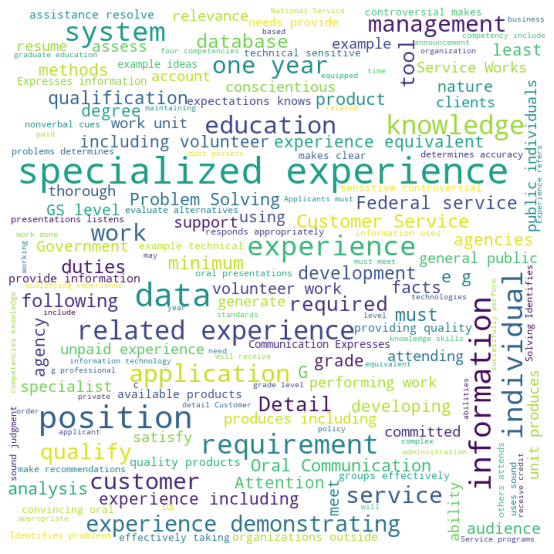

<Figure size 432x288 with 0 Axes>

In [65]:
for arg in df["Education"]: 

    tokens = arg.split()  
      
    top_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(top_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (7.5, 7.5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
plt.savefig("WordCloud2.png")